# Scikit-Learn Python Library


***

This notebook is a overview of the [sckit-learn Python libray](https://scikit-learn.org/stable/): a free software machine learning library for the [Python](https://www.python.org/) programming language. 
It also supports supervised and unsupervised learning and provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

<br>

## An introduction to machine learning with scikit-learn
https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [1]:
import sklearn.datasets as datasets

In [2]:
iris = datasets.load_iris()

In [3]:
digits = datasets.load_digits()

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
from sklearn import svm

In [8]:
clf = svm.SVC(gamma=0.001, C=100.)

In [9]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [10]:
clf.predict(digits.data[-1:])

array([8])

<br>

## Different Types of Scikit-Learn Algorithms

***

The two main categories of Machine Learning Algorithms are Supervised learning and Unsupervised learning.

### Supervised Learning
Supervised learning is where an algorithm is trained on input data that has been labeled for a particular output based on example input-output pairs that exist in the algorithm.
This basically means the computer is already aware of what the possible output will be of the raw input being processed.

<img src="https://cdn.datafloq.com/cms/2018/01/23/supervised-learning.png" alt="Supervised-Learning" width="600">

Click [here](https://datafloq.com/read/machine-learning-explained-understanding-learning/4478) for more information about the image.

### UnSupervised Learning
Unsupervised learning uses algorithms to analyze raw input data, without any pre-assigned labels. It works by discovering patterns and differences in the data set.

<img src="https://www.gong-jj.com/images/ml-unsup/unsup_header.png" alt="Supervised-Learning" width="600">

Click [here](https://www.gong-jj.com/ul/) for more information about the image.

<br>

## Supervised Learning Algorithms

***

## Classification: Analysis on The Wine Quality Data Set 

[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) available at the [UC Irvine Machine Learning](https://archive.ics.uci.edu/ml/index.php)

### Setup

In [11]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [12]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

### The Red Wine Quality Dataset

In [13]:
# Load the Wine Quality data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [14]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [15]:
# Have a look at the data.
df.shape

(1599, 12)

In [16]:
# Summary statistics.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
# Feature Relationships
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [19]:
# Assign Specific Labels to Wine Quality
bins = (0, 4, 7, 10)
labels = ["bad", "medium", "good"]
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [20]:
df['quality'].value_counts()

medium    1518
bad         63
good        18
Name: quality, dtype: int64

### Visualise Data Set

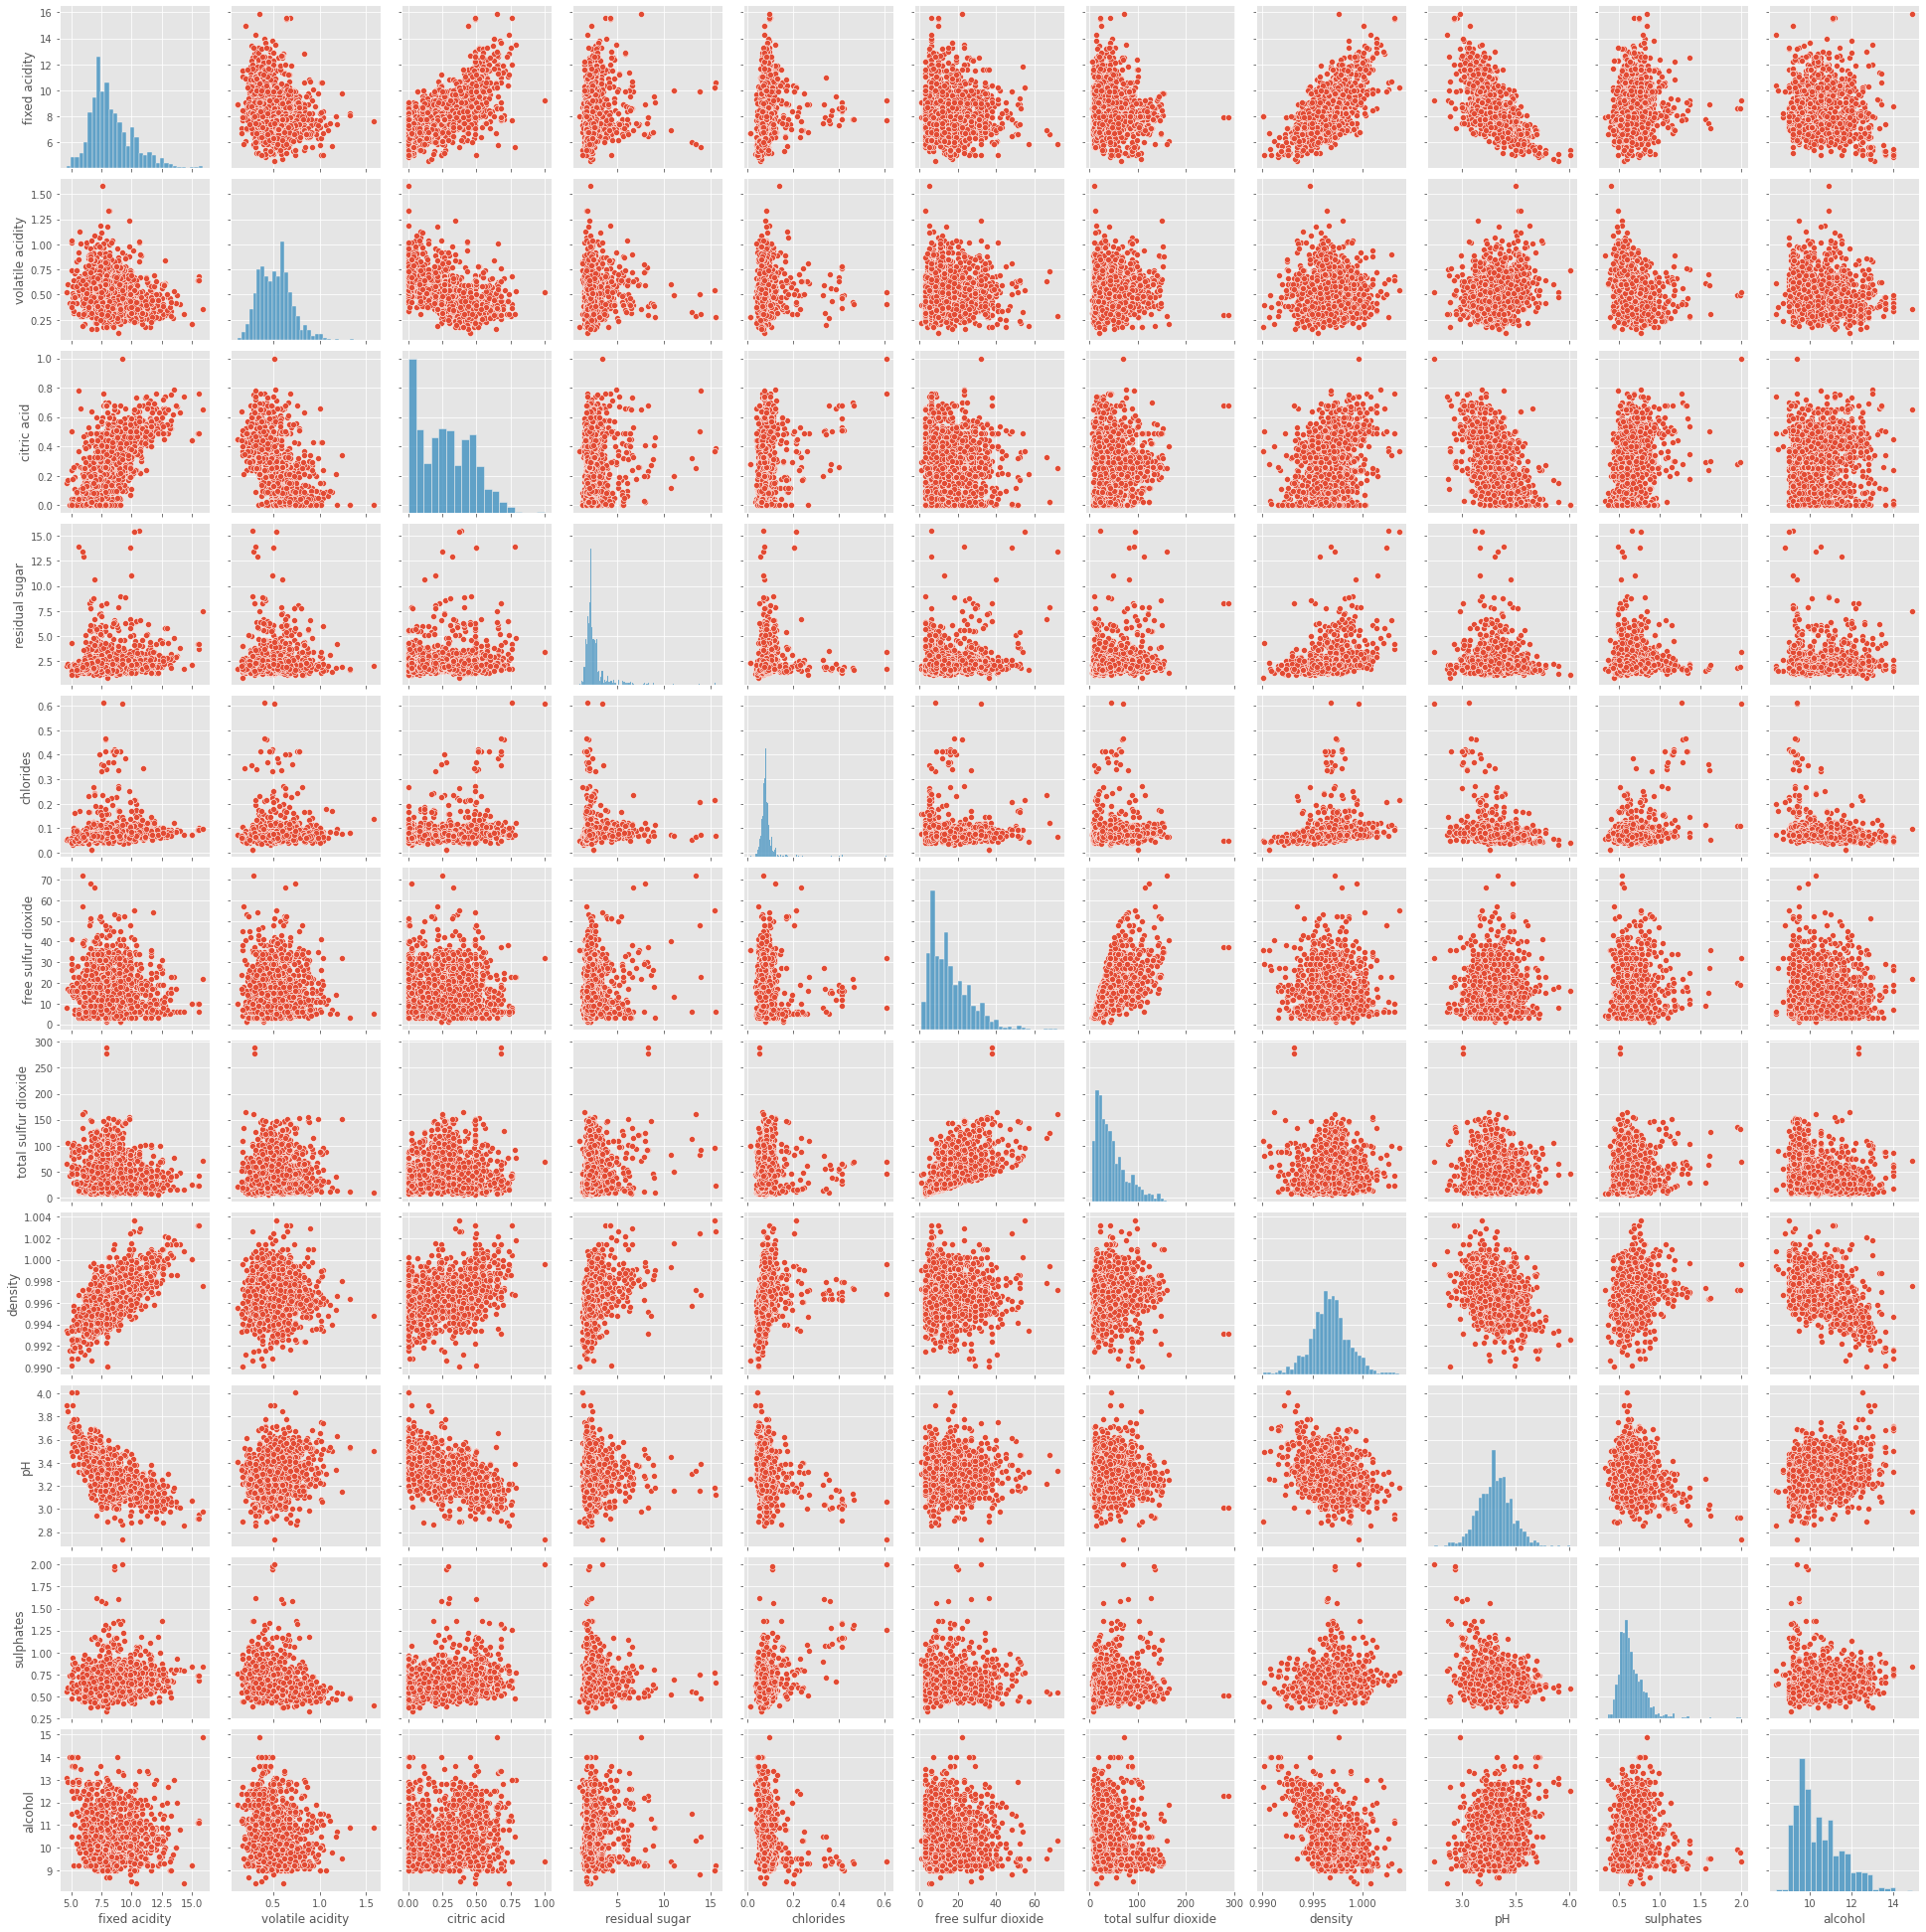

In [21]:
# Scatter plots and kdes.
sns.pairplot(df)

### Two Dimensions Data Representation

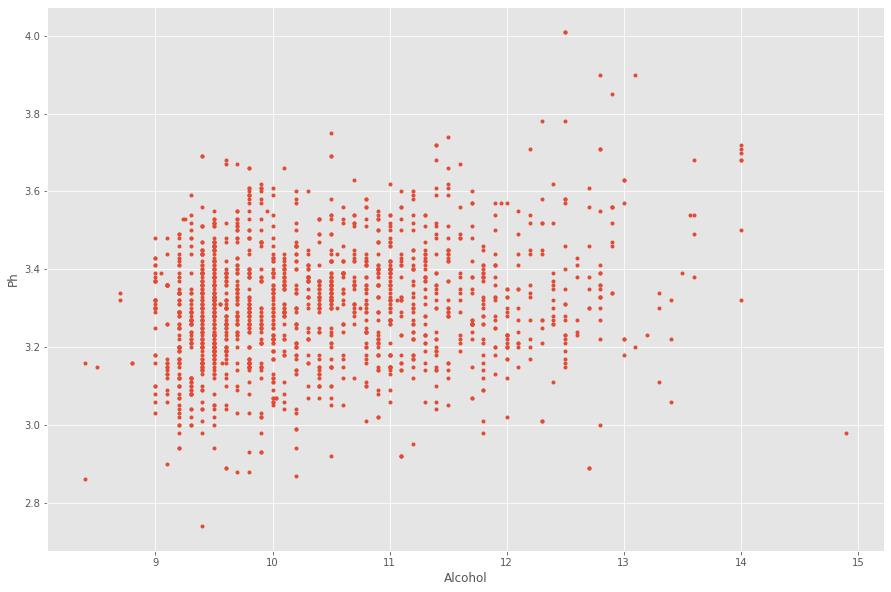

In [22]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['alcohol'], df['pH'], '.')

# Set axis labels.
ax.set_xlabel('Alcohol');
ax.set_ylabel('Ph');

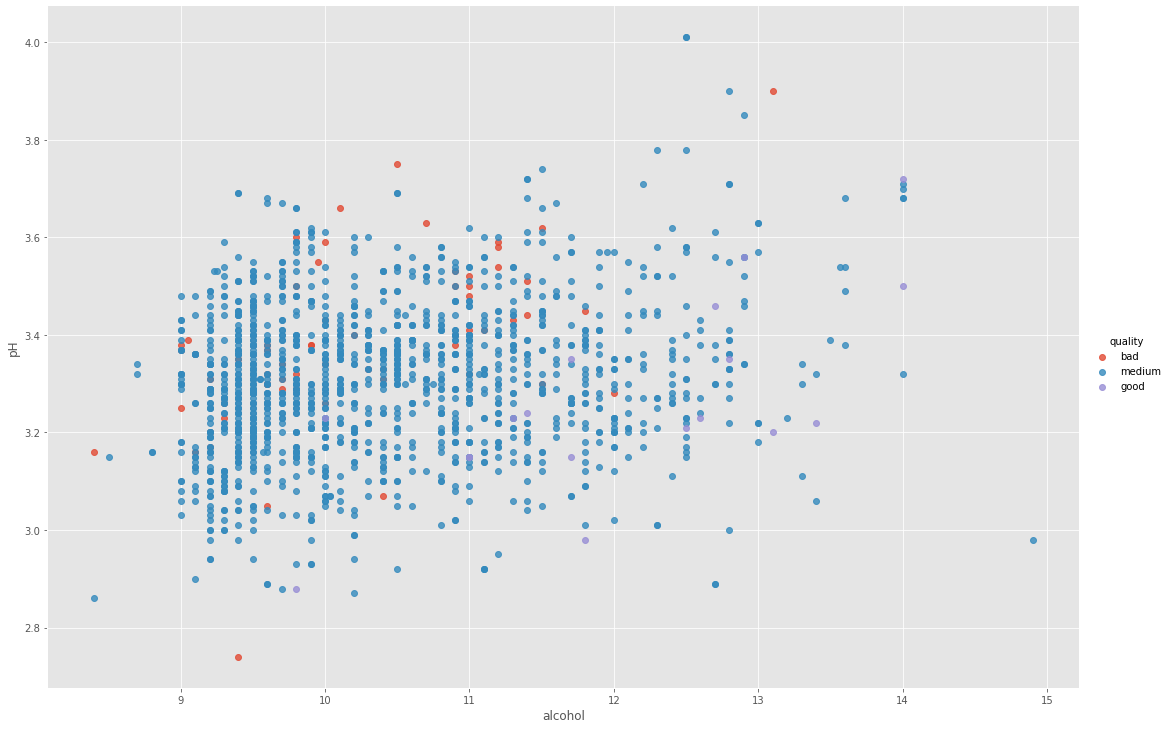

In [23]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x='alcohol', y='pH', hue='quality', data=df, fit_reg=False, height=10, aspect=1.5)

<AxesSubplot:xlabel='quality', ylabel='count'>

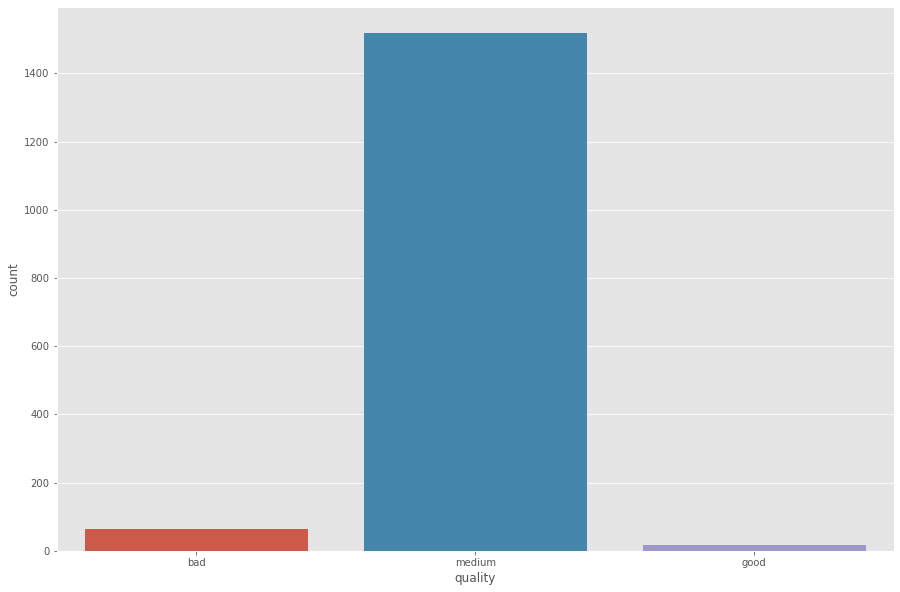

In [24]:
# Count Plot 
sns.countplot(x='quality',data=df)

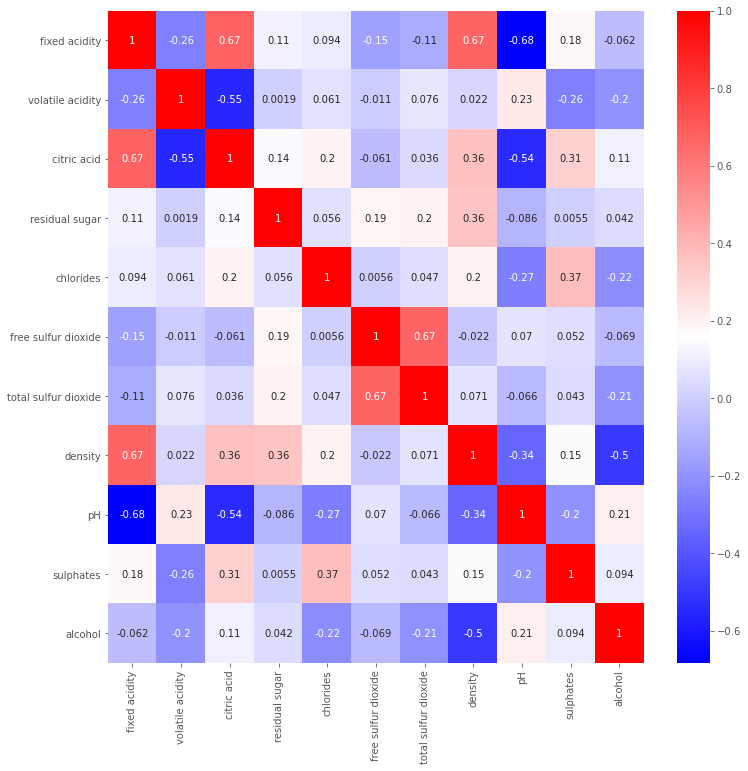

In [25]:
# Heatmap Visulation Dataset
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True,cmap="bwr")
plt.show()

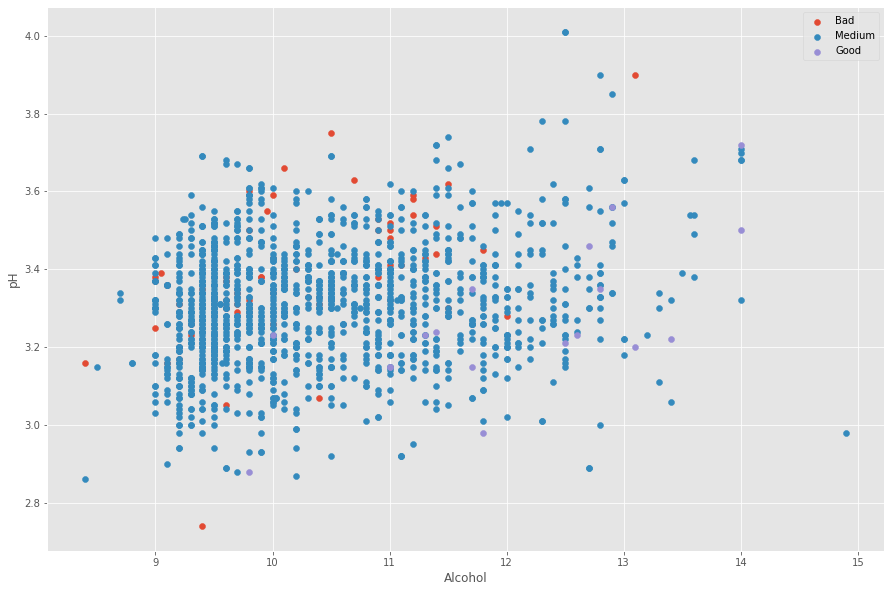

In [26]:
# Segregate the data.
bad = df[df['quality'] == 'bad']
medium = df[df['quality'] == 'medium']
good = df[df['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(bad['alcohol'], bad['pH'], label='Bad')
ax.scatter(medium['alcohol'], medium['pH'], label='Medium')
ax.scatter(good['alcohol'], good['pH'], label='Good')


# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [27]:
# How the segregation works.
df['quality'] == 'bad'

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

In [28]:
df[df['quality'] == 'bad'].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,bad
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,bad
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,bad
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,bad
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,bad


### Using groupby()

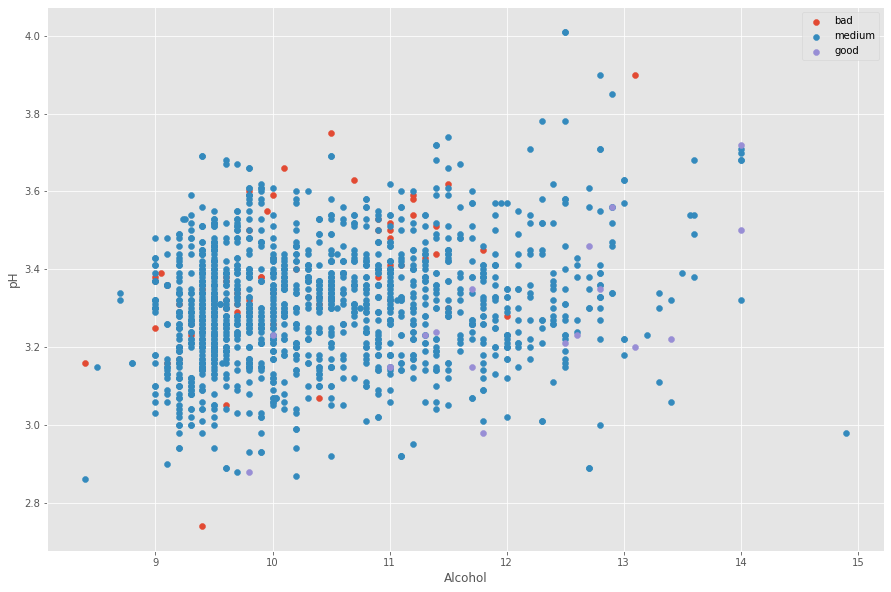

In [29]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=quality)

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [30]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [31]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873
medium,8.335310,0.520909,0.273590,2.532279,0.087349,16.063900,47.121212,0.996767,3.308603,0.659585,10.411759
good,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [32]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j is:\n{j[:3]}")
    print()


i is: 'bad'
j is:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
18            7.4              0.59         0.08             4.4      0.086   
38            5.7              1.13         0.09             1.5      0.172   
41            8.8              0.61         0.30             2.8      0.088   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
18                  6.0                  29.0   0.9974  3.38       0.50   
38                  7.0                  19.0   0.9940  3.50       0.48   
41                 17.0                  46.0   0.9976  3.26       0.51   

    alcohol quality  
18      9.0     bad  
38      9.8     bad  
41      9.3     bad  


i is: 'medium'
j is:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8  

## Test and Train Split

In [38]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [39]:
# Show some training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
189,7.9,0.49,0.32,1.9,0.082,17.0,144.0,0.99680,3.20,0.55,9.5,medium
1051,8.5,0.46,0.59,1.4,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,medium
1373,7.7,0.75,0.27,3.8,0.110,34.0,89.0,0.99664,3.24,0.45,9.3,medium
283,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,medium
1108,8.1,0.78,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,medium


In [40]:
# The indices of the train array.
train.index

Int64Index([ 189, 1051, 1373,  283, 1108,  839,  546,    4,  379, 1410,
            ...
            1042,  470, 1215,  254,   14,  848,   89,  992, 1434, 1412],
           dtype='int64', length=1199)

In [36]:
# Show some testing data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1409,6.0,0.51,0.00,2.1,0.064,40.0,54.0,0.99500,3.54,0.93,10.7,medium
1054,8.2,0.64,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1,medium
1576,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,medium
491,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,medium
190,8.2,0.50,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4,medium


In [37]:
test.index.size

400

## Two Dimensions: Test Train Split

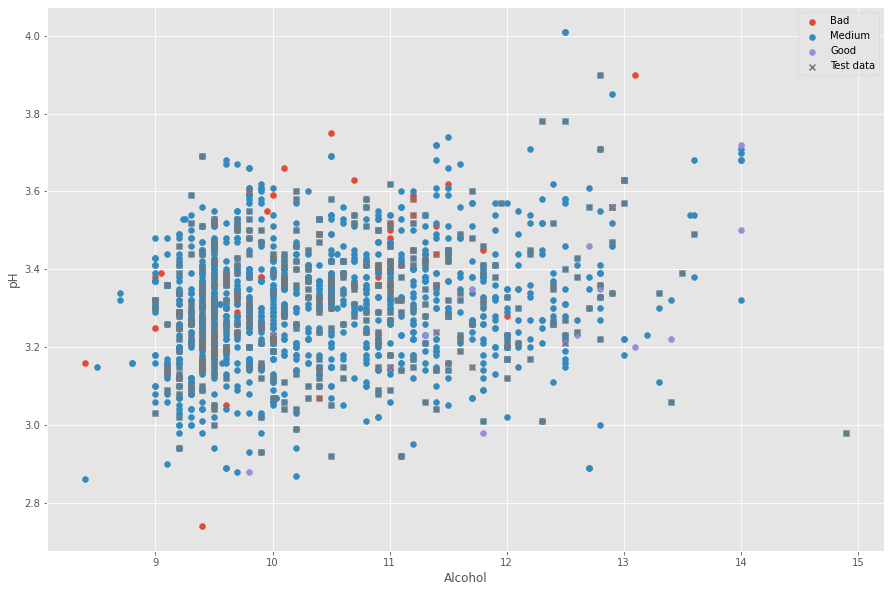

In [42]:
# Segregate the data.
bad = df[df['quality'] == 'bad']
medium = df[df['quality'] == 'medium']
good = df[df['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(bad['alcohol'], bad['pH'], marker='o' , label='Bad')
ax.scatter(medium['alcohol'], medium['pH'], marker='o', label='Medium')
ax.scatter(good['alcohol'], good['pH'], marker='o', label='Good')

# Scatter plot for testing data.
ax.scatter(test['alcohol'], test['pH'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

## Two Dimensions: Inputs and outputs

In [43]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['alcohol', 'pH']], train['quality']

In [44]:
# Peek at the inputs.
inputs.head()

,alcohol,pH
189,9.5,3.20
1051,9.2,3.03
1373,9.3,3.24
283,10.5,3.38
1108,9.5,3.36


In [45]:
# Peek at the outputs.
outputs.head()

189     medium
1051    medium
1373    medium
283     medium
1108    medium
Name: quality, dtype: category
Categories (3, object): ['bad' < 'medium' < 'good']

## Two Dimensions: Logistic regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [46]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [51]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['alcohol', 'pH']])

In [52]:
# Eyeball the misclassifications.
predictions == test['quality']

937     False
1358     True
564      True
562      True
113      True
        ...  
552      True
974      True
1179     True
1335     True
1544     True
Name: quality, Length: 400, dtype: bool

In [54]:
# What proportion were correct?
lre.score(test[['alcohol', 'pH']], test['quality'])

0.9625

In [ ]:
Two Dimensions: Misclassified

## Basic Example of a Sckit-Learn Algorithm

***

## References
1. DataQuest "Scikit-learn Tutorial: Machine Learning in Python" https://www.dataquest.io/blog/sci-kit-learn-tutorial/

2. 

3. 

***

## End